In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('customers_data.csv')

# Basic inspection
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.describe())


(200, 5)
CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object
CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
0
       CustomerID         Age  Annual Income   Spending Score
count  200.000000  200.000000      200.000000      200.000000
mean   100.500000   38.850000       60.560000       50.200000
std     57.879185   13.969007       26.264721       25.823522
min      1.000000   18.000000       15.000000        1.000000
25%     50.750000   28.750000       41.500000       34.750000
50%    100.500000   36.000000       61.500000       50.000000
75%    150.250000   49.000000       78.000000       73.000000
max    200.000000   70.000000      137.000000       99.000000


Step 1: Loading the Dataset
First, we loaded customer_data.csv using Pandas. Then we quickly checked how many rows and columns there were, if any data was missing, and whether there were any duplicates. Looked at the data types just to be sure everything was clean. Ran describe() to get a feel for the ranges — like how old people are, their income, and how much they spend.

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
X = df[['Age', 'Annual Income ', 'Spending Score']]

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 2: Preprocessing the Data
We can’t just throw raw numbers into clustering because the scales are totally off. So yeah, we standardized the features using StandardScaler, so all values like age, income, and spending score were brought to the same level. Without this, the model would’ve been biased toward large numbers.

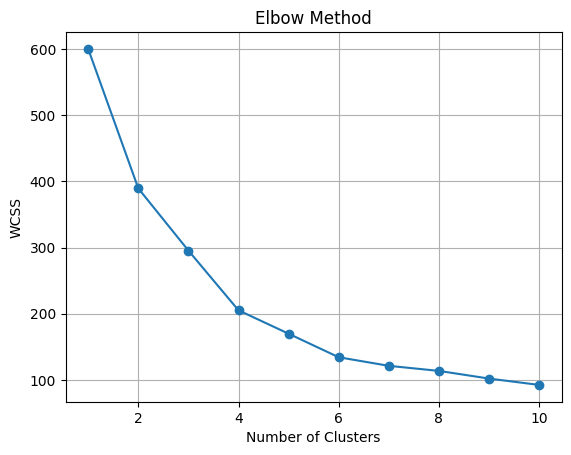

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()


Step 3: Finding the Right Number of Clusters
Next up, we had to figure out how many clusters make sense. Used the Elbow Method for this — basically plotted WCSS vs. number of clusters. The point where the graph bends like an elbow? That’s our sweet spot. We also tried silhouette score just to double-check how good the clustering might be.

In [15]:
# Let's assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Step 4: Applying K-Means
With the number of clusters figured out, we applied K-Means clustering using that count. Every customer was assigned a cluster label, which means we successfully grouped them based on behavior. Now each one falls into a category we can analyze.

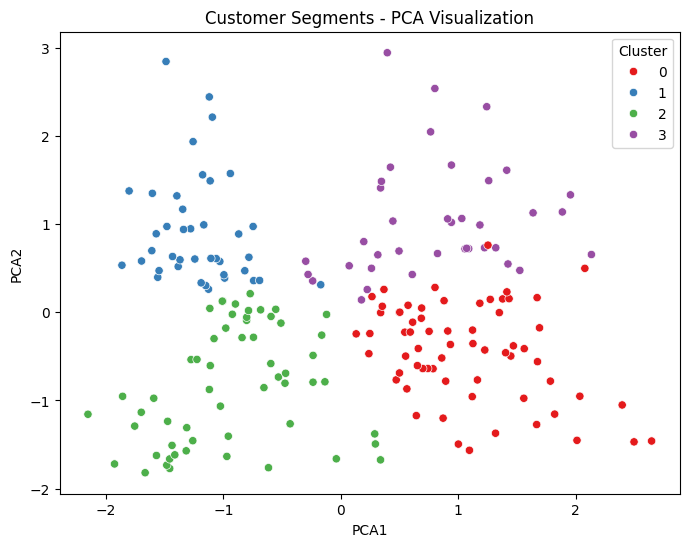

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("Customer Segments - PCA Visualization")
plt.show()


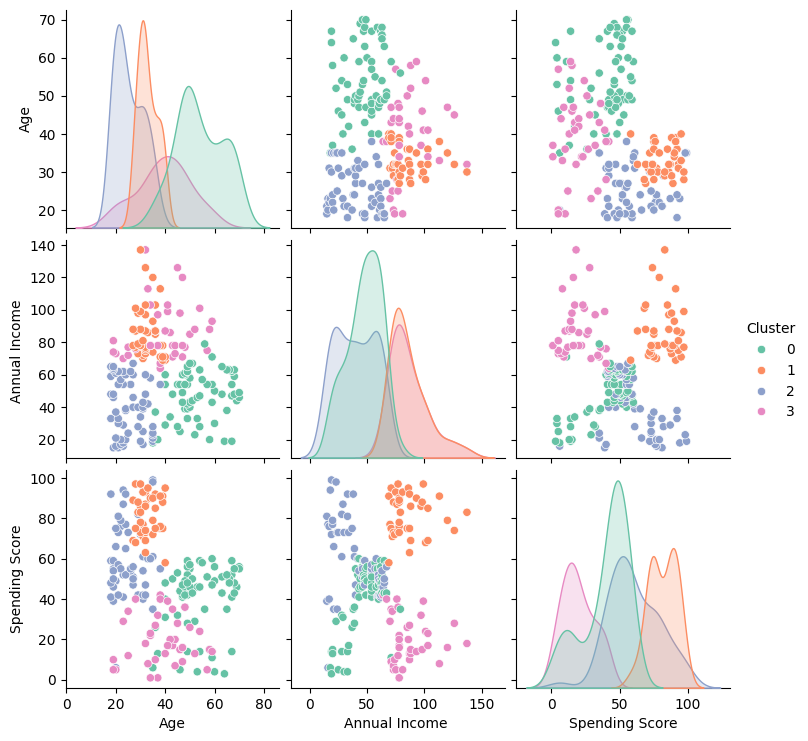

In [18]:
sns.pairplot(df[['Age', 'Annual Income ', 'Spending Score', 'Cluster']], hue='Cluster', palette='Set2')
plt.show()


Step 5: Visualizing the Clusters
To actually see the clusters, we used PCA to bring the data down to 2 dimensions and plotted a scatterplot. Each cluster was colored differently so it’s easier to tell them apart. Also threw in a pairplot to check relationships between features inside clusters — helped a lot in understanding patterns.

In [20]:
df.to_csv('clustered_data.csv', index=False)


step 6: will involve saving a file which will store the clustered data